In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import joblib

In [2]:
model = load_model('lstm_multivariate_forex_12Timestep13EPOCH64BATCH_architecturenum1.h5', compile=False)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [3]:
# Buat scaler yang sama dengan saat training (asumsi pakai MinMaxScaler 0-1)
scaler = MinMaxScaler(feature_range=(0, 1))

In [4]:
#Dummy data bossku

input_data = [
    [0.91769, 0.91796, 0.91766, 0.91787],
    [0.91789, 0.91833, 0.91789, 0.91828],
    [0.91827, 0.91849, 0.91801, 0.91814],
    [0.91815, 0.91818, 0.91799, 0.91803],
    [0.91806, 0.91831, 0.91805, 0.91810],
    [0.91811, 0.91822, 0.91789, 0.91810],
    [0.91808, 0.91835, 0.91808, 0.91824],
    [0.91824, 0.91837, 0.91815, 0.91816],
    [0.91814, 0.91828, 0.91801, 0.91825],
    [0.91825, 0.91869, 0.91819, 0.91866],
    [0.91864, 0.91867, 0.91843, 0.91845],
    [0.91847, 0.91856, 0.91838, 0.91852],
]
input_array = np.array(input_data, dtype=np.float32)


In [5]:
# Cek jumlah input
if len(input_data) != 12:
    raise ValueError("Harus ada tepat 12 bar OHLC sebagai input!")

In [6]:
# Load Scaler
ohlc_input = np.array(input_data)
scaler = joblib.load('scaler_ohlc_multistep.save')
ohlc_scaled = scaler.transform(ohlc_input)

d:\abel_prediksi\LSTM_MultiVariant_MultiStepPrediction\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [7]:
# 3. Ubah ke shape yang dibutuhkan LSTM → (1, 12, 4)
X_input = ohlc_scaled.reshape(1, 12, 4)

In [8]:
# 4. Prediksi
prediction_scaled = model.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


In [9]:
# 5. Inverse transform hasil prediksi → (5, 4)
prediction_flat = prediction_scaled.reshape(-1, 4)
prediction = scaler.inverse_transform(prediction_flat)

In [10]:
columns = ['Open', 'High', 'Low', 'Close']
df_pred = pd.DataFrame(prediction, columns=columns)
print("Prediksi OHLC untuk 5 bar ke depan:")
print(df_pred)

Prediksi OHLC untuk 5 bar ke depan:
       Open      High       Low     Close
0  0.918048  0.918440  0.917967  0.918191
1  0.918226  0.918328  0.917866  0.918091
2  0.917954  0.918266  0.917835  0.918240
3  0.918154  0.918252  0.917894  0.918174
4  0.918061  0.918284  0.917779  0.918169


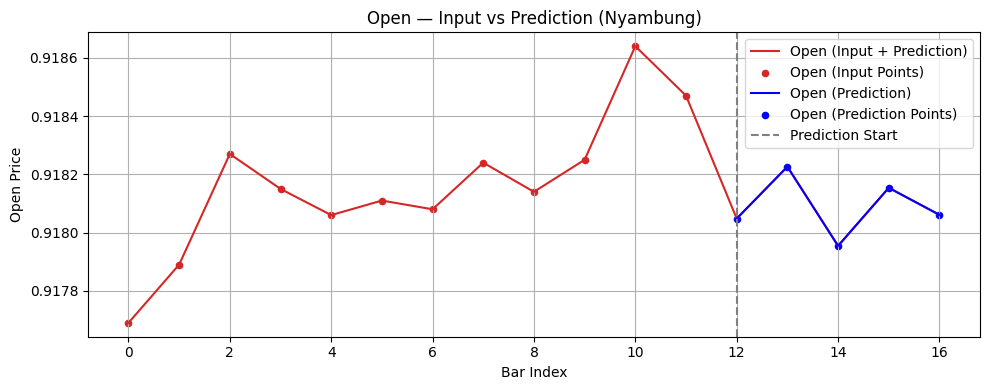

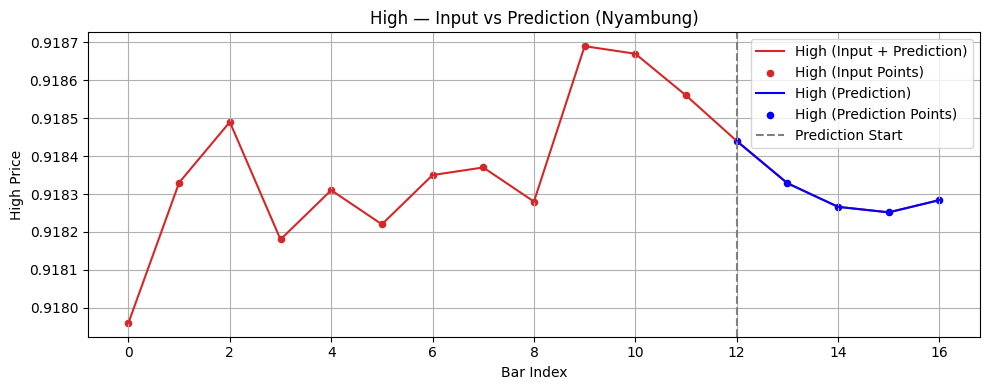

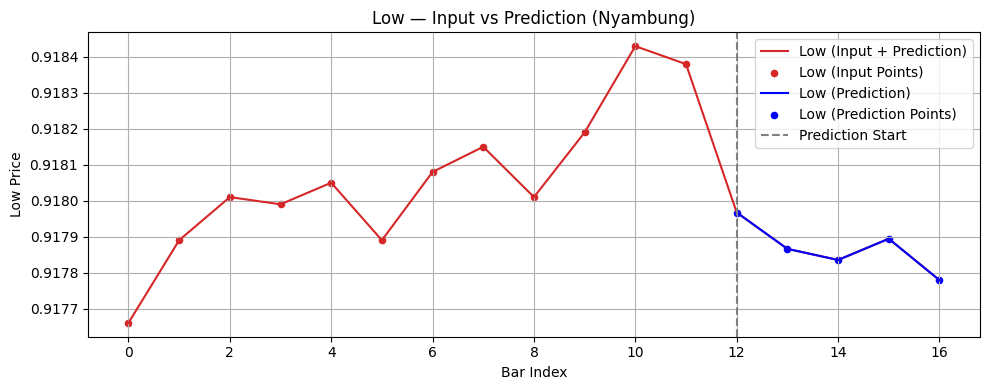

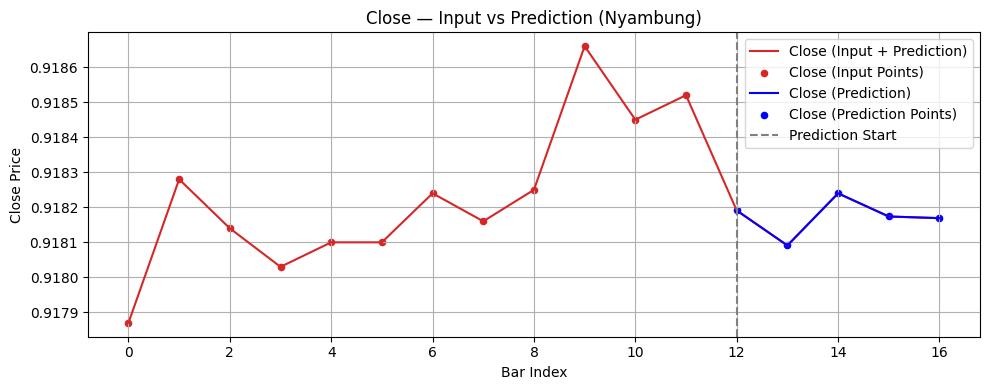

In [11]:
# tanya pak surya bel

feature_names = ['Open', 'High', 'Low', 'Close']
input_colors = ['tab:red', 'tab:red', 'tab:red', 'tab:red']  # Warna untuk input
prediction_color = 'blue'  # Warna untuk prediksi

# Plot input dan prediksi dengan warna berbeda
for i, name in enumerate(feature_names):
    full_series = np.concatenate([ohlc_input[:, i], prediction[:, i]])  # Gabungkan input dan prediksi
    plt.figure(figsize=(10, 4))
    # Plot seluruh data sebagai garis kontinu
    plt.plot(range(len(full_series)), full_series, label=f'{name} (Input + Prediction)', color=input_colors[i])
    # Tambahkan titik untuk input
    plt.scatter(range(12), ohlc_input[:, i], color=input_colors[i], s=20, label=f'{name} (Input Points)')
    # Tambahkan titik dan garis ulang untuk prediksi
    plt.plot(range(12, len(full_series)), prediction[:, i], color=prediction_color, label=f'{name} (Prediction)')
    plt.scatter(range(12, len(full_series)), prediction[:, i], color=prediction_color, s=20, label=f'{name} (Prediction Points)')
    # Garis vertikal untuk memisahkan input & prediksi
    plt.axvline(x=12, color='gray', linestyle='--', label='Prediction Start')
    plt.title(f'{name} — Input vs Prediction (Nyambung)')
    plt.xlabel('Bar Index')
    plt.ylabel(f'{name} Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [12]:

# . Buat DataFrame dari input_data
columns = ['Open', 'High', 'Low', 'Close']
df_input = pd.DataFrame(input_data, columns=columns)

#  Tambahkan datetime index — misalnya dimulai dari 2023-01-01 09:00
df_input.index = pd.date_range(start='2023-01-01 09:00', periods=len(df_input), freq='5min')

#  Lihat hasilnya
print(df_input)


                        Open     High      Low    Close
2023-01-01 09:00:00  0.91769  0.91796  0.91766  0.91787
2023-01-01 09:05:00  0.91789  0.91833  0.91789  0.91828
2023-01-01 09:10:00  0.91827  0.91849  0.91801  0.91814
2023-01-01 09:15:00  0.91815  0.91818  0.91799  0.91803
2023-01-01 09:20:00  0.91806  0.91831  0.91805  0.91810
2023-01-01 09:25:00  0.91811  0.91822  0.91789  0.91810
2023-01-01 09:30:00  0.91808  0.91835  0.91808  0.91824
2023-01-01 09:35:00  0.91824  0.91837  0.91815  0.91816
2023-01-01 09:40:00  0.91814  0.91828  0.91801  0.91825
2023-01-01 09:45:00  0.91825  0.91869  0.91819  0.91866
2023-01-01 09:50:00  0.91864  0.91867  0.91843  0.91845
2023-01-01 09:55:00  0.91847  0.91856  0.91838  0.91852


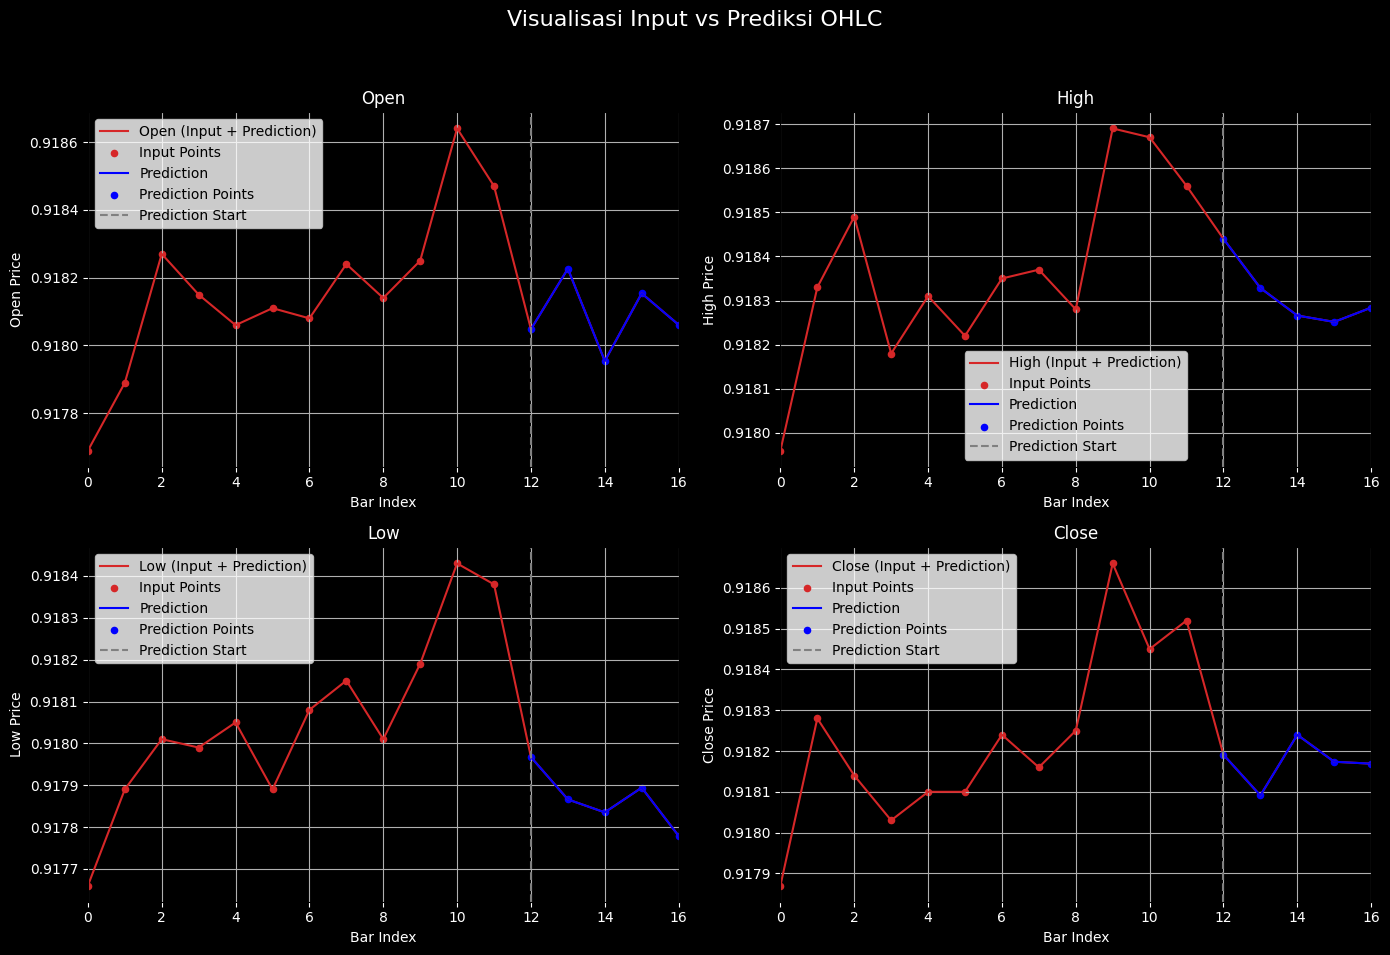

In [13]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = ['Open', 'High', 'Low', 'Close']
input_colors = ['tab:red'] * 4
prediction_color = 'blue'

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.patch.set_facecolor('black')  # Background figure
fig.suptitle('Visualisasi Input vs Prediksi OHLC', fontsize=16, color='white')

# Posisi subplot (i = index)
positions = [(0, 0), (0, 1), (1, 0), (1, 1)]

for i, name in enumerate(feature_names):
    row, col = positions[i]
    full_series = np.concatenate([ohlc_input[:, i], prediction[:, i]])
    
    ax = axs[row][col]
    ax.plot(range(len(full_series)), full_series, label=f'{name} (Input + Prediction)', color=input_colors[i])
    ax.scatter(range(12), ohlc_input[:, i], color=input_colors[i], s=20, label='Input Points')
    ax.plot(range(12, len(full_series)), prediction[:, i], color=prediction_color, label='Prediction')
    ax.scatter(range(12, len(full_series)), prediction[:, i], color=prediction_color, s=20, label='Prediction Points')
    ax.axvline(x=12, color='gray', linestyle='--', label='Prediction Start')
    ax.set_title(f'{name}')
    ax.set_xlabel('Bar Index')
    ax.set_ylabel(f'{name} Price')
    ax.grid(True)
    ax.legend()
    ax.set_xlim(0, len(full_series)-1)
    ax.set_facecolor('black')  # Background area plot
    ax.tick_params(colors='white')  # Warna sumbu x dan y
    ax.title.set_color('white')     # Warna judul subplot
    ax.xaxis.label.set_color('white')  # Label sumbu x
    ax.yaxis.label.set_color('white')  # Label sumbu y


# Tambahkan garis pemisah (opsional, bisa dihapus jika tidak perlu)
for spine in ['top', 'bottom', 'left', 'right']:
    for ax_row in axs:
        for ax in ax_row:
            ax.spines[spine].set_visible(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ruang untuk judul utama
plt.show()


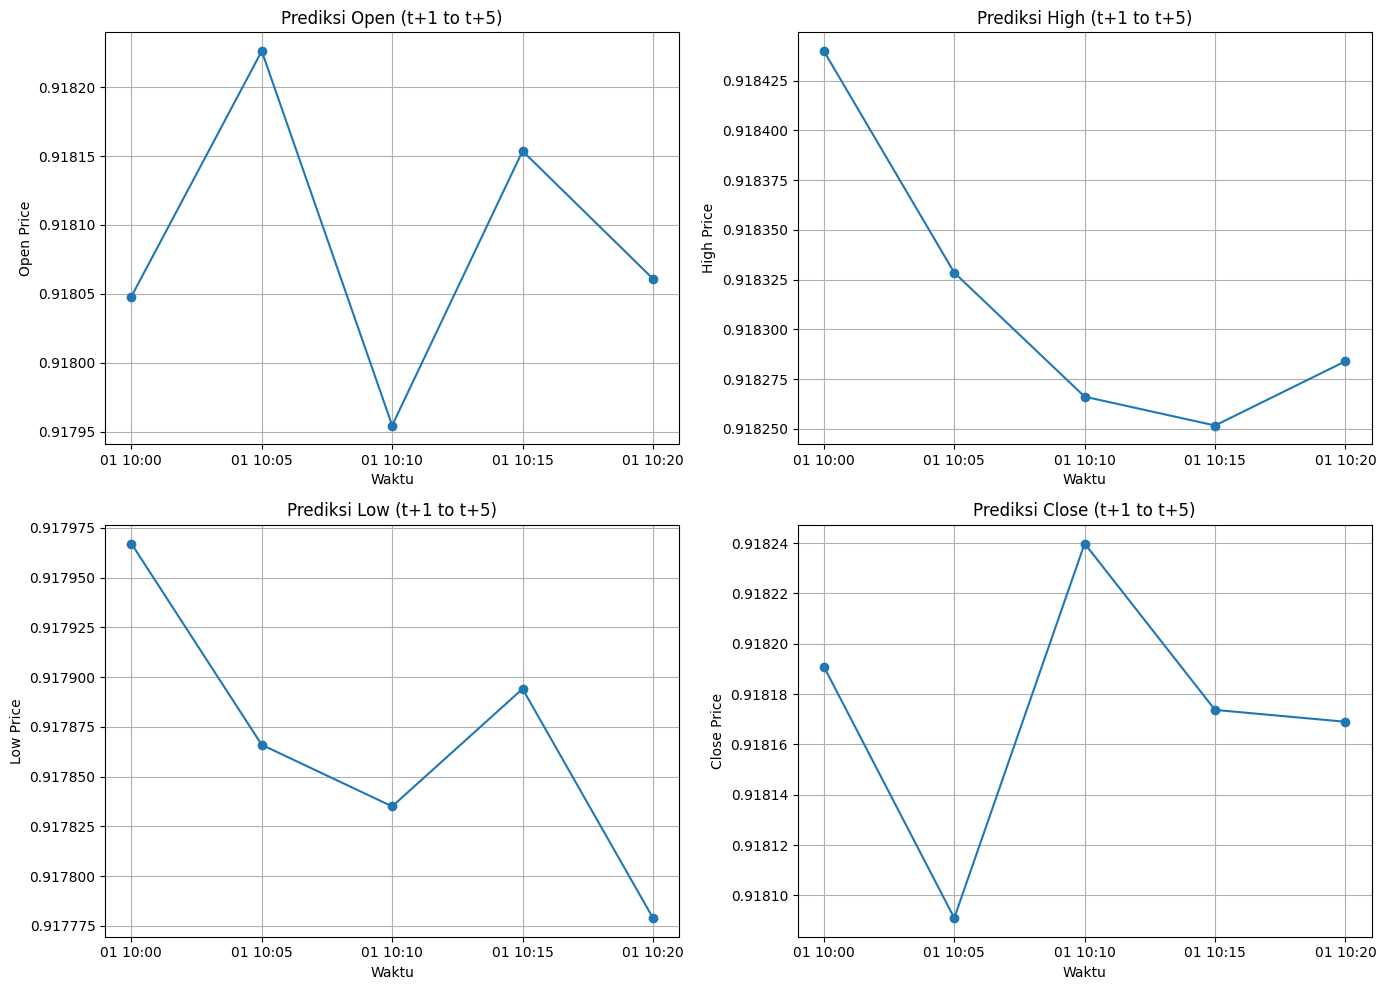

In [14]:

columns = ['Open', 'High', 'Low', 'Close']
df_prediction = pd.DataFrame(prediction, columns=columns)

# Tambahkan index waktu (optional)
df_prediction.index = pd.date_range(start='2023-01-01 10:00', periods=5, freq='5min')

# Plot 4 fitur dalam 4 subplot terpisah
plt.figure(figsize=(14, 10))
for i, col in enumerate(columns):
    plt.subplot(2, 2, i+1)
    plt.plot(df_prediction.index, df_prediction[col], marker='o')
    plt.title(f'Prediksi {col} (t+1 to t+5)')
    plt.xlabel('Waktu')
    plt.ylabel(f'{col} Price')
    plt.grid(True)

plt.tight_layout()
plt.show()
